In [ ]:
import sys
sys.executable

In [ ]:
# initial lodata load

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load datasets
budget = pd.read_csv('../data/raw/Budget.csv')
transactions = pd.read_csv('../data/raw/personal_transactions.csv')

print("="*60)
print("BUDGET DATA")
print("="*60)
print(f"Shape: {budget.shape}\n")
print(budget)
print(f"\nTotal Monthly Budget: ${budget['Budget'].sum()}")

In [ ]:
# Transactions 

In [ ]:
print("="*60)
print("TRANSACTIONS DATA")
print("="*60)
print(f"Shape: {transactions.shape}")
print(f"\nColumns: {transactions.columns.tolist()}\n")
print(transactions.head(15))
print(f"\nData types:\n{transactions.dtypes}")
print(f"\nMissing values:\n{transactions.isnull().sum()}")

In [ ]:
# Stats

In [ ]:
# Numeric summary
print("Statistical Summary:")
print(transactions.describe())

# Check for categorical columns
print("\n" + "="*60)
for col in transactions.columns:
    if transactions[col].dtype == 'object':
        print(f"\n{col} - Unique values: {transactions[col].nunique()}")
        print(transactions[col].value_counts().head(10))

In [ ]:
# 4 Flow

In [7]:
# Parse dates
transactions['Date'] = pd.to_datetime(transactions['Date'])
transactions['Year'] = transactions['Date'].dt.year
transactions['Month'] = transactions['Date'].dt.month
transactions['YearMonth'] = transactions['Date'].dt.to_period('M')

# Separate income vs expenses
income = transactions[transactions['Transaction Type'] == 'credit']
expenses = transactions[transactions['Transaction Type'] == 'debit']

print("INCOME:")
print(f"Total income: ${income['Amount'].sum():,.2f}")
print(f"Average monthly income: ${income.groupby('YearMonth')['Amount'].sum().mean():,.2f}")
print(f"\nIncome breakdown:")
print(income.groupby('Category')['Amount'].agg(['count', 'sum', 'mean']))

print("\n" + "="*60)
print("EXPENSES:")
print(f"Total expenses: ${expenses['Amount'].sum():,.2f}")
print(f"Average monthly expenses: ${expenses.groupby('YearMonth')['Amount'].sum().mean():,.2f}")
print(f"\nTop 5 expense categories:")
print(expenses.groupby('Category')['Amount'].sum().sort_values(ascending=False).head())

INCOME:
Total income: $124,269.76
Average monthly income: $5,917.61

Income breakdown:
                     count       sum         mean
Category                                         
Credit Card Payment     72  30519.76   423.885556
Paycheck                46  93750.00  2038.043478

EXPENSES:
Total expenses: $96,083.78
Average monthly expenses: $4,575.42

Top 5 expense categories:
Category
Credit Card Payment    33041.36
Mortgage & Rent        24754.50
Home Improvement       19092.87
Groceries               2795.21
Utilities               2776.00
Name: Amount, dtype: float64


In [ ]:
# 5 monthly agg

In [8]:
# Monthly aggregation
monthly_summary = transactions.groupby('YearMonth').agg({
    'Amount': lambda x: x[transactions.loc[x.index, 'Transaction Type'] == 'credit'].sum() - 
                        x[transactions.loc[x.index, 'Transaction Type'] == 'debit'].sum()
}).rename(columns={'Amount': 'Net_Savings'})

monthly_income = income.groupby('YearMonth')['Amount'].sum()
monthly_expenses = expenses.groupby('YearMonth')['Amount'].sum()

monthly_summary['Income'] = monthly_income
monthly_summary['Expenses'] = monthly_expenses
monthly_summary['Savings_Rate'] = (monthly_summary['Net_Savings'] / monthly_summary['Income'] * 100).round(2)

print("MONTHLY FINANCIAL SUMMARY:")
print(monthly_summary)

print(f"\nAverage monthly savings: ${monthly_summary['Net_Savings'].mean():,.2f}")
print(f"Average savings rate: {monthly_summary['Savings_Rate'].mean():.1f}%")

MONTHLY FINANCIAL SUMMARY:
           Net_Savings   Income  Expenses  Savings_Rate
YearMonth                                              
2018-01        4231.44  7162.89   2931.45         59.07
2018-02        2055.70  5220.75   3165.05         39.38
2018-03        3821.34  7321.50   3500.16         52.19
2018-04        1137.34  7166.88   6029.54         15.87
2018-05       -6300.48  5091.55  11392.03       -123.74
2018-06        2351.31  6017.19   3665.88         39.08
2018-07        1697.36  4666.34   2968.98         36.37
2018-08        4982.97  7379.15   2396.18         67.53
2018-09        1947.72  5234.71   3286.99         37.21
2018-10        2173.88  5022.23   2848.35         43.29
2018-11        3055.31  6018.96   2963.65         50.76
2018-12        2207.11  5635.10   3427.99         39.17
2019-01        -417.87  4769.44   5187.31         -8.76
2019-02        1336.61  4500.01   3163.40         29.70
2019-03        4550.74  7792.25   3241.51         58.40
2019-04        1102.3

In [ ]:
# 6

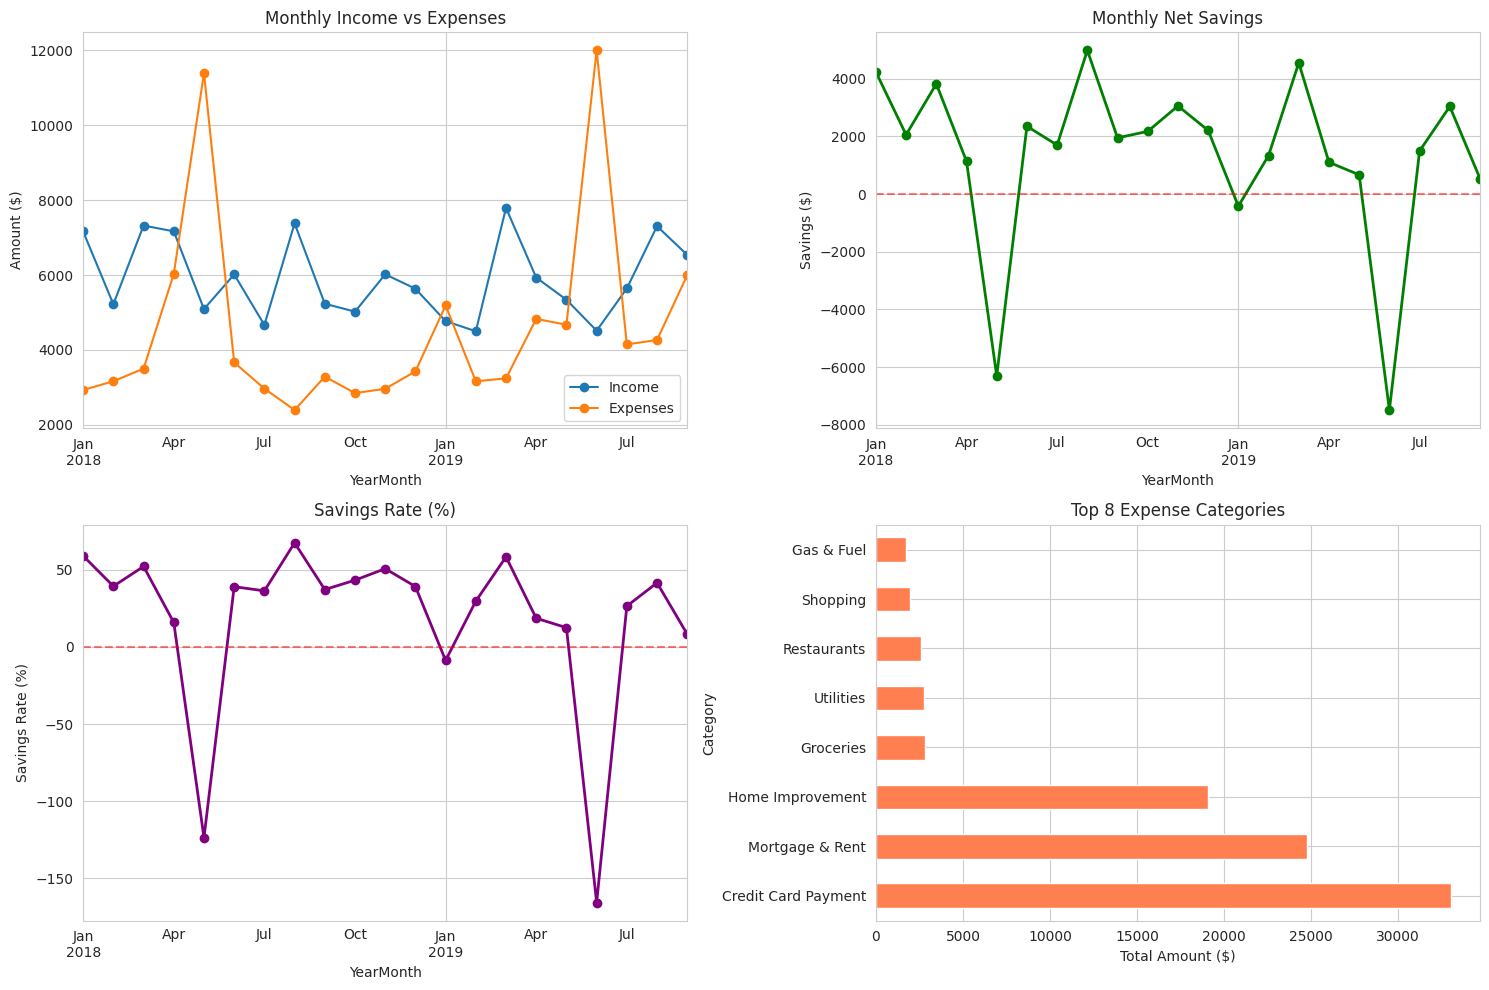

Visualizations complete!


In [9]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Income vs Expenses over time
ax1 = axes[0, 0]
monthly_summary[['Income', 'Expenses']].plot(ax=ax1, marker='o')
ax1.set_title('Monthly Income vs Expenses')
ax1.set_ylabel('Amount ($)')
ax1.legend()
ax1.grid(True)

# 2. Net Savings over time
ax2 = axes[0, 1]
monthly_summary['Net_Savings'].plot(ax=ax2, marker='o', color='green', linewidth=2)
ax2.axhline(y=0, color='red', linestyle='--', alpha=0.5)
ax2.set_title('Monthly Net Savings')
ax2.set_ylabel('Savings ($)')
ax2.grid(True)

# 3. Savings Rate over time
ax3 = axes[1, 0]
monthly_summary['Savings_Rate'].plot(ax=ax3, marker='o', color='purple', linewidth=2)
ax3.axhline(y=0, color='red', linestyle='--', alpha=0.5)
ax3.set_title('Savings Rate (%)')
ax3.set_ylabel('Savings Rate (%)')
ax3.grid(True)

# 4. Expense breakdown
ax4 = axes[1, 1]
top_categories = expenses.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(8)
top_categories.plot(kind='barh', ax=ax4, color='coral')
ax4.set_title('Top 8 Expense Categories')
ax4.set_xlabel('Total Amount ($)')

plt.tight_layout()
plt.show()

print("Visualizations complete!")

In [ ]:
# budget vs analysis

In [10]:
# Compare budget vs actual spending
actual_spending = expenses.groupby('Category')['Amount'].sum()
budget_comparison = budget.set_index('Category')
budget_comparison['Actual'] = actual_spending
budget_comparison['Monthly_Budget'] = budget_comparison['Budget']
budget_comparison['Total_Budget_Period'] = budget_comparison['Budget'] * 21  # 21 months of data
budget_comparison['Variance'] = budget_comparison['Actual'] - budget_comparison['Total_Budget_Period']
budget_comparison['Over_Budget'] = budget_comparison['Variance'] > 0

print("BUDGET vs ACTUAL (for entire period):")
print(budget_comparison.sort_values('Variance', ascending=False))

BUDGET vs ACTUAL (for entire period):
                        Budget    Actual  Monthly_Budget  Total_Budget_Period  \
Category                                                                        
Home Improvement           250  19092.87             250                 5250   
Mortgage & Rent           1100  24754.50            1100                23100   
Electronics & Software       0    719.00               0                    0   
Mobile Phone                65   1680.40              65                 1365   
Movies & DVDs                0    222.19               0                    0   
Gas & Fuel                  75   1715.17              75                 1575   
Fast Food                   15    330.63              15                  315   
Internet                    75   1570.88              75                 1575   
Music                       11    224.49              11                  231   
Shopping                   100   1973.24             100               